### Exploration of subtasks / methodology:

 - ### Caption sentiment class extraction
 - ### Caption sentiment classifier
 - ### Image feature extraction Pipeline: 
     - VGG-16
     - Inception
     - AlexNet
         - According to [google's dataset paper](https://www.aclweb.org/anthology/P18-1238.pdf) Inception_Resnet_v2 is best for feature extraction
 - ### Image object detection/ data
 - ### Object + Sentiment sentence generation
 - ### End to End model from tutorial
 - ### Caption evaluation pipeline:
     - BLEU score
     - Perplexity?
 

## Initial loading and displaying

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from utils import load_meta_data_from_dir

In [3]:
data_folder_name = 'initial_sample'

In [4]:
image_captions, images_folder = load_meta_data_from_dir(data_folder_name)

In [6]:
len(image_captions)

caption  ...                           image_path
index                                                     ...                                     
0                            snowman on a red background  ...     data\initial_sample\images\0.png
1      celebrity celebrates with his team mates after...  ...     data\initial_sample\images\1.png
2      action shot of basketball player , passing the...  ...     data\initial_sample\images\2.png
3                           a sunny winter day by lake .  ...     data\initial_sample\images\3.png
4      the extraordinary domed ceiling , with an arti...  ...     data\initial_sample\images\4.png
...                                                  ...  ...                                  ...
9625                      adapted work to the universe .  ...  data\initial_sample\images\9625.png
9626          praying and folding hands over poetry book  ...  data\initial_sample\images\9626.png
9627   cute hand drawn seamless pattern with circles ...  ...  data\initial_sample\images\9627.png
9628              view of a rocky coast in the evening .  ...  data\initial_sample\images\9628.png
9629   nebula and his clouds of interstellar dust and...  ...  data\initial_sample\images\9629.png

[9303 rows x 7 columns]

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
#load a few sample images with captions
def display_samples(meta_df, num_samples=5, seed = 0):
    #sample num_sample rows from the dataframe
    samples = meta_df.sample(n=num_samples,random_state = 0)
    for idx,row in samples.iterrows():
        file_name = row['image_path']
        caption = row['caption']
        #get objects and confidence scores
        objects = row['objects'].split(',')
        confidences = row['object_confidence'].split(',')
        
        obj_conf = [str((obj,conf[0:4])) for obj,conf in zip(objects,confidences)]
        num_obj = len(obj_conf)
        obj_str = "\n".join(obj_conf)
        image = Image.open(file_name)
        fig = plt.figure(figsize=(10,(0.3*num_obj)))
        ax = fig.add_subplot(121)
        
                         
        plt.xticks([])
        plt.yticks([])
        ax.imshow(image) 
        ax.set_title(caption)
        ax = fig.add_subplot(122)
        ax.text(0.1, 0.5, obj_str, horizontalalignment='left',verticalalignment='center')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
        







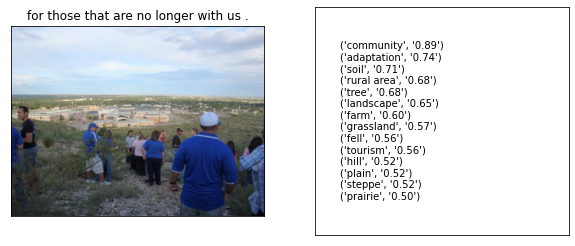

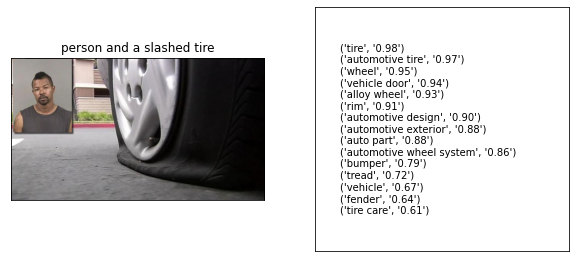

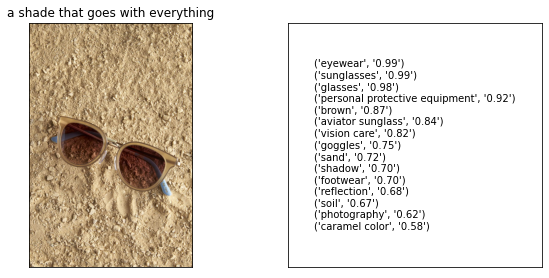

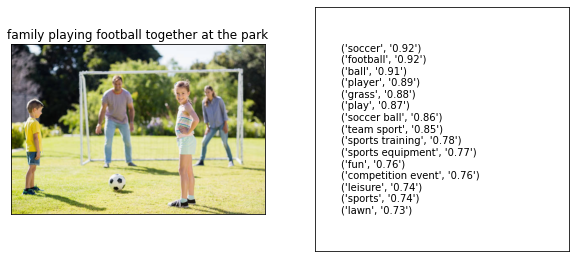

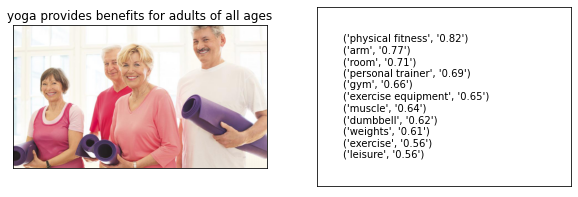

In [8]:
display_samples(image_captions)

## Profiling
- Size distribution of images
- Aspect Ration distribution of images: w/h
- Distribution of number of objects per image
- Distribution of number of objects at various confidence thresholds
- Distribution of caption size for each image

### Size distribution of images
This takes a while to run

In [9]:
image_captions['size'] = image_captions['image_path'].apply(lambda p: Image.open(p).size)
image_captions

caption  \
index                                                      
0                            snowman on a red background   
1      celebrity celebrates with his team mates after...   
2      action shot of basketball player , passing the...   
3                           a sunny winter day by lake .   
4      the extraordinary domed ceiling , with an arti...   
...                                                  ...   
9625                      adapted work to the universe .   
9626          praying and folding hands over poetry book   
9627   cute hand drawn seamless pattern with circles ...   
9628              view of a rocky coast in the evening .   
9629   nebula and his clouds of interstellar dust and...   

                                                    link  \
index                                                      
0      https://thumb10.shutterstock.com/display_pic_w...   
1      https://media.gettyimages.com/photos/david-bec...   
2      https://onwisconsin.uwalumni.com/content/uploa...   
3      https://s-media-cache-ak0.pinimg.com/originals...   
4      https://i.pinimg.com/736x/7d/7a/bd/7d7abd23c2d...   
...                                                  ...   
9625   https://i.pinimg.com/736x/b6/85/d9/b685d9287f3...   
9626   https://media.istockphoto.com/photos/praying-a...   
9627   https://thumb7.shutterstock.com/display_pic_wi...   
9628   https://thumb1.shutterstock.com/display_pic_wi...   
9629   https://drscdn.500px.org/photo/224935905/m%3D9...   

                                                 objects  \
index                                                      
0      snowman,cartoon,christmas eve,greeting card,sa...   
1      player,sports,tournament,sports equipment,team...   
2      sports,team sport,ball game,player,sport venue...   
3      sky,snow,winter,natural landscape,nature,blue,...   
4      ceiling,chandelier,light fixture,lighting,arch...   
...                                                  ...   
9625   text,sky,font,astronomical object,universe,atm...   
9626   white,black,hand,black-and-white,finger,monoch...   
9627   text,circle,font,pattern,line,design,number,il...   
9628   rock,sea,coast,shore,sky,wave,ocean,coastal an...   
9629   astronomical object,astronomy,galaxy,celestial...   

                                                     mid  \
index                                                      
0      /m/0152hh,/m/0215n,/m/014r1s,/m/03r8dh,/m/027g...   
1      /m/02vzx9,/m/06ntj,/m/012sbd,/m/05y5lj,/m/03x0...   
2      /m/06ntj,/m/03x045,/m/020m7t,/m/02vzx9,/m/0bmg...   
3      /m/01bqvp,/m/06_dn,/m/086mh,/m/03d28y3,/m/05h0...   
4      /m/03gfsp,/m/02ws6z,/m/08jpwt,/m/019sc6,/m/03n...   
...                                                  ...   
9625   /m/07s6nbt,/m/01bqvp,/m/03gq5hm,/m/01d9ll,/m/0...   
9626   /m/083jv,/m/019sc,/m/0k65p,/m/01g6gs,/m/09cx8,...   
9627   /m/07s6nbt,/m/01vkl,/m/03gq5hm,/m/0hwky,/m/03s...   
9628   /m/01cbzq,/m/06npx,/m/01lxd,/m/02fm9k,/m/01bqv...   
9629   /m/01d9ll,/m/0dc_v,/m/039b5,/m/02rhkz,/m/01cts...   

                                       object_confidence   pos  \
index                                                            
0      0.9607862830162048,0.9256524443626404,0.869515...     0   
1      0.995377242565155,0.9889867305755615,0.9811984...     1   
2      0.9889867305755615,0.9755526781082153,0.974188...     2   
3      0.9884884357452393,0.9849196076393127,0.983304...     3   
4      0.9757712483406067,0.9078124165534973,0.849791...     4   
...                                                  ...   ...   
9625   0.9626815915107727,0.9585431814193726,0.945139...  9625   
9626   0.9628557562828064,0.9571874141693115,0.937342...  9626   
9627   0.9523645639419556,0.9162501692771912,0.908029...  9627   
9628   0.953548014163971,0.9518063068389893,0.9457200...  9628   
9629   0.932354211807251,0.925068736076355,0.91731548...  9629   

                                image_path         size  
index   

In [10]:
#number of different sizes:
image_captions['size'].describe()

count           9303
unique          3479
top       (450, 470)
freq             800
Name: size, dtype: object

In [11]:
#profiling widths and heights
image_captions['height'] = image_captions['size'].apply(lambda x: x[1])
image_captions['width'] = image_captions['size'].apply(lambda x: x[0])

In [12]:
image_captions['height'].describe()


count    9303.000000
mean      665.512953
std       332.147768
min       150.000000
25%       470.000000
50%       600.000000
75%       736.000000
max      5760.000000
Name: height, dtype: float64

In [13]:
image_captions['width'].describe()

count    9303.000000
mean      714.701709
std       366.482221
min       150.000000
25%       470.000000
50%       612.000000
75%       800.000000
max      5184.000000
Name: width, dtype: float64

<AxesSubplot:ylabel='Frequency'>

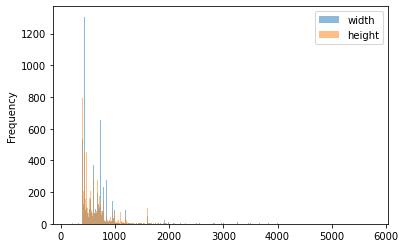

In [102]:
image_captions[['width','height']].plot.hist(bins = 500, alpha=0.5)

In [101]:
#looks like most images have a height and width under 1000 

In [95]:
quant = 0.9
print(image_captions['height'].quantile(quant))
print(image_captions['width'].quantile(quant))

1024.0
1024.0


In [96]:
q = np.linspace(.1, 1, 9, 0)
print(image_captions['height'].quantile(q))
print(image_captions['width'].quantile(q))

0.1     412.0
0.2     450.0
0.3     470.0
0.4     500.0
0.5     600.0
0.6     612.0
0.7     683.0
0.8     802.6
0.9    1024.0
Name: height, dtype: float64
0.1     446.0
0.2     450.0
0.3     508.0
0.4     604.0
0.5     612.0
0.6     672.0
0.7     736.0
0.8     852.0
0.9    1024.0
Name: width, dtype: float64


### Aspect ratio distribution of images

In [17]:
image_captions['aspect_ratio'] = image_captions.apply(lambda x: x.width/x.height , axis=1)

In [18]:
image_captions['aspect_ratio'].describe()

count    9303.000000
mean        1.127491
std         0.356388
min         0.477124
25%         0.779412
50%         1.000000
75%         1.493035
max         2.257143
Name: aspect_ratio, dtype: float64

In [19]:
quant = 0.99
print(image_captions['aspect_ratio'].quantile(quant))

1.7857142857142858


<AxesSubplot:ylabel='Frequency'>

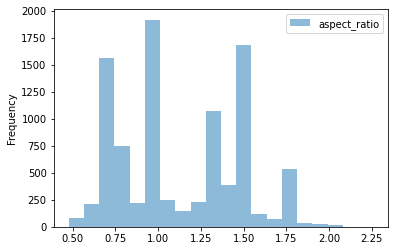

In [20]:
image_captions[['aspect_ratio']].plot.hist(bins=20, alpha=0.5)

### Number of objects per image

In [21]:
image_captions['num_obj'] = image_captions['objects'].apply(lambda o: 0 if pd.isna(o) else len(str(o).split(',')))

In [22]:
image_captions['num_obj'].describe()


count    9303.000000
mean       12.065678
std         3.626968
min         0.000000
25%         9.000000
50%        14.000000
75%        15.000000
max        15.000000
Name: num_obj, dtype: float64

In [23]:
image_captions['num_obj'].value_counts()


15    4489
12     534
11     519
10     499
9      493
13     452
14     447
8      442
7      437
6      346
5      271
4      181
3      124
2       47
1       18
0        4
Name: num_obj, dtype: int64

All but 4 images have atleast 1 object in them and a maximum of 15 objects in them and around 50% of the images have 15 objects detected

<AxesSubplot:ylabel='Frequency'>

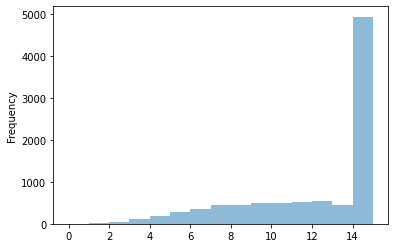

In [24]:
image_captions['num_obj'].plot.hist(bins=15, alpha=0.5)

### Distribution of num_objects at various confidence thresholds


In [25]:
def get_objects_with_conf_above(meta_df, threshold):
    """
    Returns a Series with a list of tuples (object,float) of object and confidence with confidence greater that threshold.
    """

    #object_conf tuple for objects with confidence above threshold
    obj_conf = image_captions.apply(lambda x: [] if (pd.isna(x.objects) or pd.isna(x.object_confidence))
                                   else [(obj,float(conf)) for (obj,conf) in zip(x.objects.split(','), x.object_confidence.split(',')) 
                                        if float(conf) >=threshold], axis=1)
    return obj_conf
    


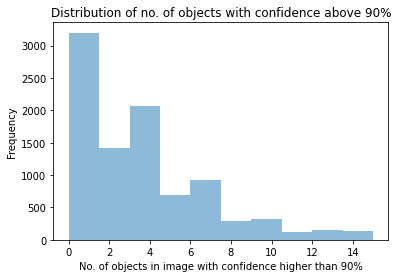

Number of images with atleast 1 caption with confidence higher than 90%: 7725


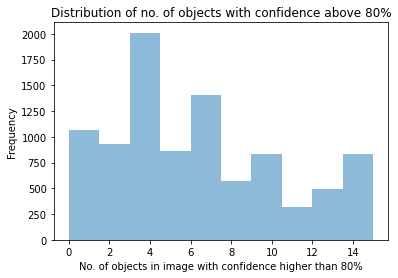

Number of images with atleast 1 caption with confidence higher than 80%: 8916


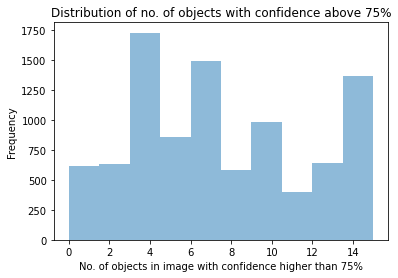

Number of images with atleast 1 caption with confidence higher than 75%: 9105


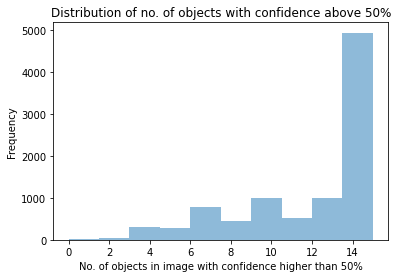

Number of images with atleast 1 caption with confidence higher than 50%: 9299


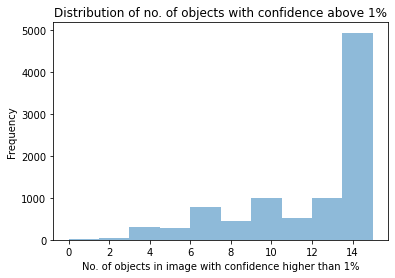

Number of images with atleast 1 caption with confidence higher than 1%: 9299


In [26]:
#get number of objects at various thresholds and plot them
thresholds = [90,80,75,50,1]
for t in thresholds:
    num_obj_conf = get_objects_with_conf_above(image_captions,(t*0.01)).apply(lambda l: len(l))
    num_obj_conf.plot.hist(alpha=0.5,title=f"Distribution of no. of objects with confidence above {t}%").set_xlabel(f"No. of objects in image with confidence higher than {t}%")
    plt.show()
    print(f"Number of images with atleast 1 caption with confidence higher than {t}%:",len(num_obj_conf[num_obj_conf > 0]))   


### Distribution of caption size

In [130]:
caption_size = image_captions['caption'].apply(lambda x: len(x.split(" ")))
caption_size.describe()

count    9303.000000
mean       10.318929
std         4.769947
min         5.000000
25%         7.000000
50%         9.000000
75%        12.000000
max        41.000000
Name: caption, dtype: float64

<AxesSubplot:title={'center':'Distribution of caption size of image captions'}, ylabel='Frequency'>

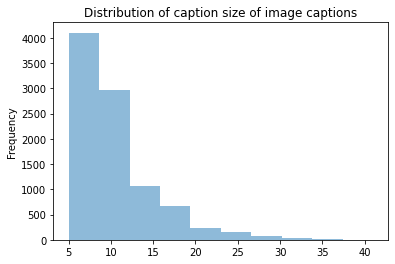

In [132]:
caption_size.plot.hist(alpha=0.5,title="Distribution of caption size of image captions")


In [138]:
caption_size.quantile([0.01,0.1,0.25,0.5,0.7,0.9,0.95, 0.99])


0.01     5.0
0.10     6.0
0.25     7.0
0.50     9.0
0.70    12.0
0.90    17.0
0.95    20.0
0.99    27.0
Name: caption, dtype: float64

All captions are more than 5 words and only 5% are above 20 words

## Divide captions into sentiment classes. 

 - nltk's pretrained SentimentIntensityAnalyser: sentiment and polarity
 - huggingface pretrained classifier

In [145]:
def display_samples_with_hf_label(meta_df, label, conf_thresh=0.9,num_samples=5, seed = 0, sent_class_col = 'hf_sent_class',sent_conf_col = 'hf_sent_conf' ):
    """
    Looking at positive and negative samples
    """
    #setting colors
    if("pos" in label.lower()):
        color = 'green'
    else:
        color = 'red'
    #filter to see high confidence examples of desired labels
    high_conf = meta_df[meta_df[sent_class_col] == label]
    high_conf = high_conf[high_conf[sent_conf_col] >= conf_thresh]
    #sample num_sample rows from the dataframe
    samples = high_conf.sample(n=num_samples,random_state = seed)
    for idx,row in samples.iterrows():
        file_name = row['image_path']
        caption = row['caption']
        #get objects and confidence scores
        objects = row['objects'].split(',')
        confidences = row['object_confidence'].split(',')
        sent_label_conf_str = (row[sent_class_col],str(row[sent_conf_col]))
        
        obj_conf = [str((obj,conf[0:4])) for obj,conf in zip(objects,confidences)]
        num_obj = len(obj_conf)
        obj_str = "\n".join(obj_conf)
        image = Image.open(file_name)
        fig = plt.figure(figsize=(10,(0.3*num_obj)))
        ax = fig.add_subplot(121)
        
                         
        plt.xticks([])
        plt.yticks([])
        ax.imshow(image) 
        ax.set_title(caption)
        ax = fig.add_subplot(122)
        ax.text(0.1, 1, sent_label_conf_str, horizontalalignment='left',verticalalignment='top', fontsize = 11, color = color, bbox=dict(boxstyle = "square", color='white' ))
        
        ax.text(0.1, 0.5, obj_str, horizontalalignment='left',verticalalignment='center')
        plt.xticks([])
        plt.yticks([])
        plt.show()

### NLTK's pretrained classifer and polarity scores

In [27]:
import nltk


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

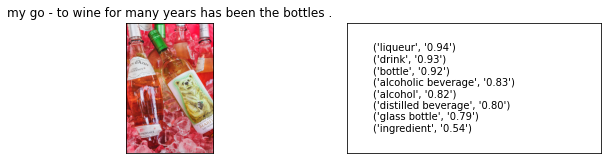

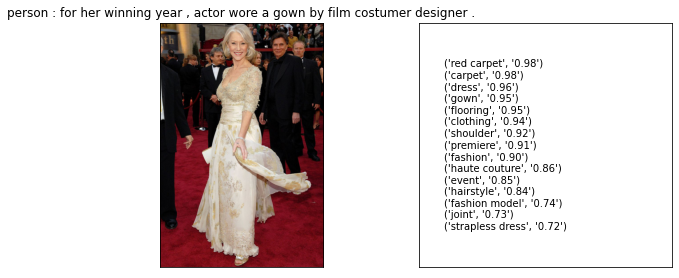

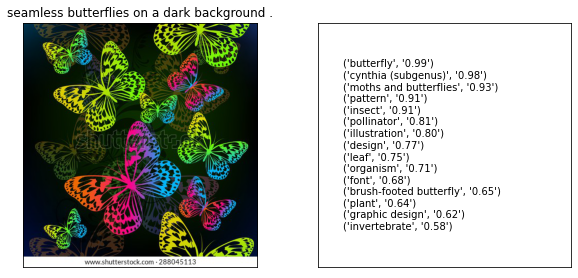

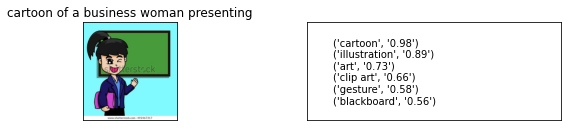

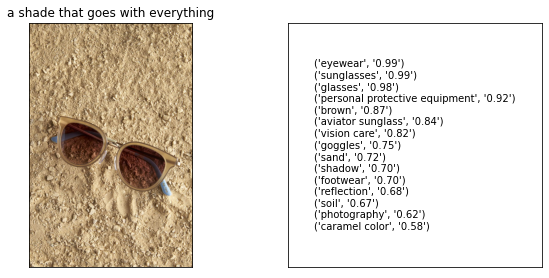

In [142]:
#example on random captions

random_sample = image_captions.sample(n=50, random_state=0)
display_samples(random_sample)

In [143]:
random_sample['nltk_sent_int'] = random_sample['caption'].apply(lambda x: sia.polarity_scores(x))
#classify using polarity scores: class with max polarity
random_sample['nltk_sent'] = random_sample['nltk_sent_int'].apply(lambda x: max(['neu', 'pos','neg'], key=x.get))
random_sample['nltk_sent'].value_counts() 

neu    48
pos     2
Name: nltk_sent, dtype: int64

In [108]:
#now do this pfor everything and plot histogram of classes
image_captions['nltk_sent_polarity'] = image_captions['caption'].apply(lambda x: sia.polarity_scores(x))

In [109]:
image_captions['nltk_sent'] = image_captions['nltk_sent_polarity'].apply(lambda x: max(['neu', 'pos','neg'], key=x.get))

In [33]:
image_captions['nltk_sent'].describe()

count     9303
unique       3
top        neu
freq      9088
Name: nltk_sent, dtype: object

In [34]:
image_captions['nltk_sent'].value_counts()

neu    9088
pos     188
neg      27
Name: nltk_sent, dtype: int64

<AxesSubplot:>

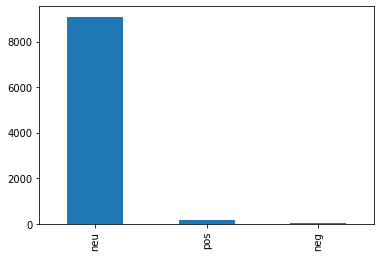

In [35]:
image_captions['nltk_sent'].value_counts().plot(kind='bar')

As we can see (and as expected), the overwhelming majority of captions are neutral

We can try limiting to the sentiment with max polarity among just positive and negative

In [36]:
image_captions['nltk_sent_pos_neg'] = image_captions['nltk_sent_polarity'].apply(lambda x: max(['pos','neg'], key=x.get))

In [37]:
image_captions['nltk_sent_pos_neg'].value_counts()

pos    8518
neg     785
Name: nltk_sent_pos_neg, dtype: int64

<AxesSubplot:>

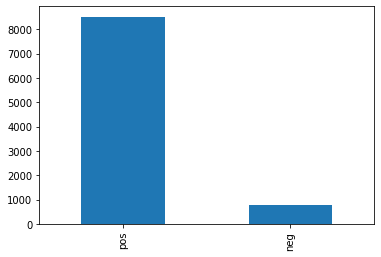

In [38]:
image_captions['nltk_sent_pos_neg'].value_counts().plot(kind='bar')

Still, classes are very unbalanced. 

In [147]:
image_captions['nltk_sent_pos_neg_conf'] = image_captions.apply(lambda x: x['nltk_sent_polarity'][x['nltk_sent_pos_neg']], axis=1)

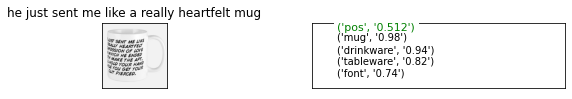

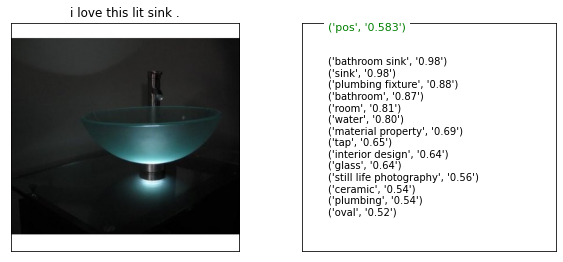

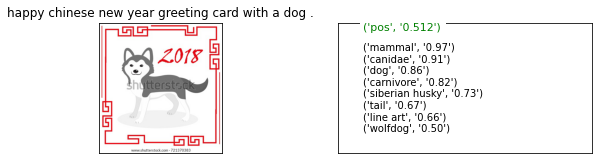

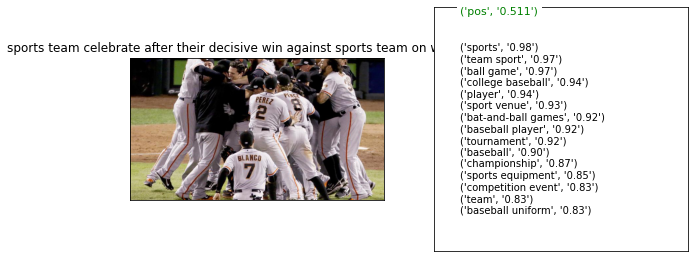

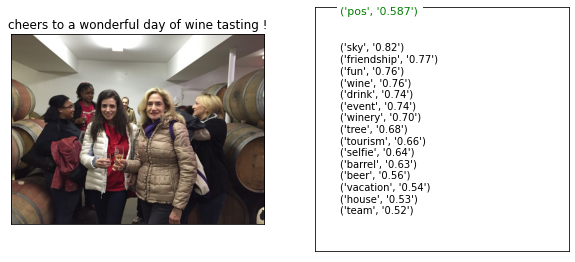

In [151]:
display_samples_with_hf_label(image_captions,'pos',conf_thresh=0.5,sent_class_col='nltk_sent_pos_neg',sent_conf_column='nltk_sent_pos_neg_conf')

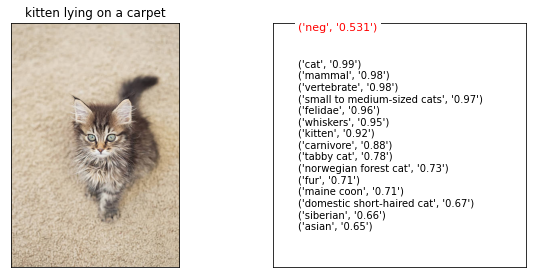

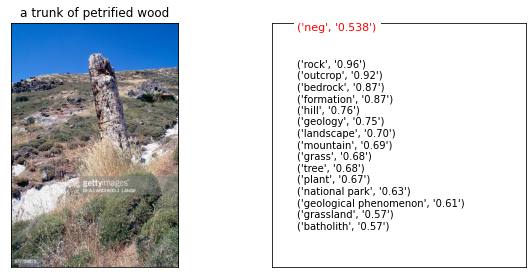

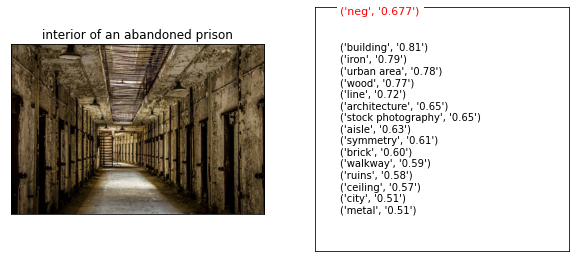

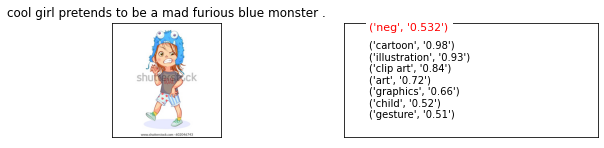

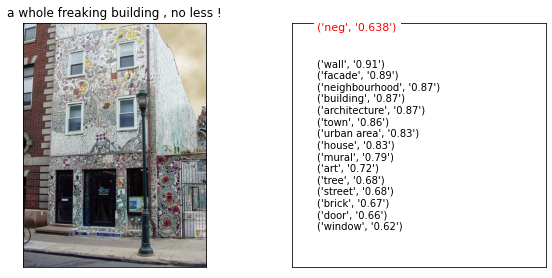

In [153]:
display_samples_with_hf_label(image_captions,'neg',conf_thresh=0.5,sent_class_col='nltk_sent_pos_neg',sent_conf_column='nltk_sent_pos_neg_conf')

## Huggingface's pretrained classifier

In [154]:

from transformers import pipeline


In [155]:
hf_sent = pipeline('sentiment-analysis')


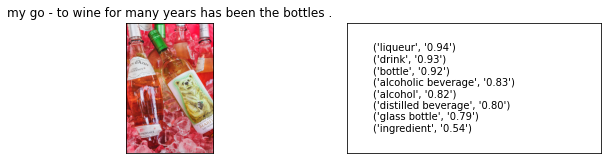

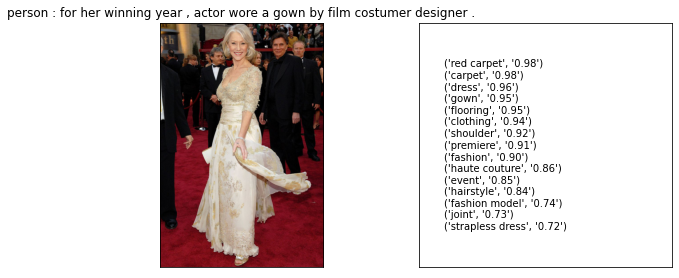

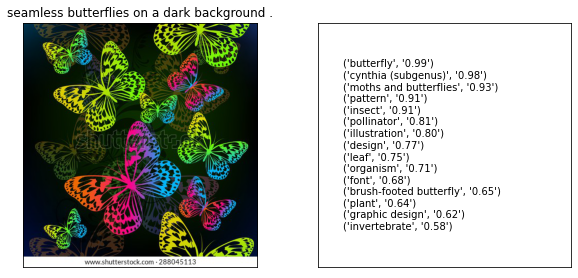

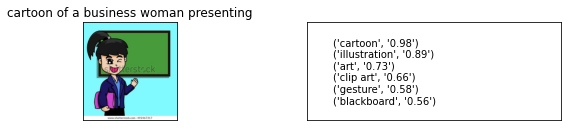

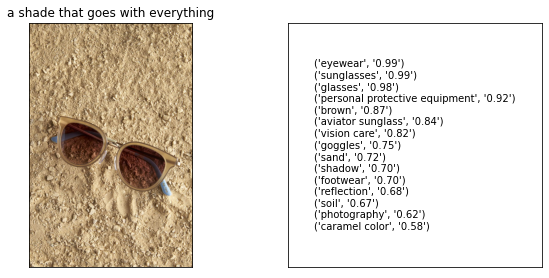

In [156]:
#example on random captions

random_sample = image_captions.sample(n=50, random_state=0)
#display 45 of the random samples
display_samples(random_sample)

In [ ]:
random_sample['hf_sent'] = random_sample['caption'].apply(lambda x: hf_sent(x))
random_sample['hf_sent_label'] = random_sample['hf_sent'].apply(lambda x: x[0]['label'])
random_sample['hf_sent_label'].value_counts()
#looks a bit more divided!

In [158]:
image_captions['hf_sent'] = image_captions['caption'].apply(lambda x: hf_sent(x))

In [160]:
image_captions['hf_sent_class'] = image_captions['hf_sent'].apply(lambda x: x[0]['label'])
image_captions['hf_sent_conf'] = image_captions['hf_sent'].apply(lambda x: x[0]['score'])

In [161]:
image_captions['hf_sent_class'].describe()

count         9303
unique           2
top       POSITIVE
freq          6405
Name: hf_sent_class, dtype: object

In [162]:
image_captions['hf_sent_class'].value_counts()

POSITIVE    6405
NEGATIVE    2898
Name: hf_sent_class, dtype: int64

<AxesSubplot:>

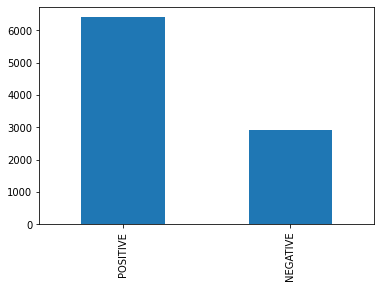

In [163]:
image_captions['hf_sent_class'].value_counts().plot(kind = 'bar')

In [164]:
image_captions['hf_sent_conf'].describe() 

count    9303.000000
mean        0.949668
std         0.098914
min         0.500172
25%         0.960117
50%         0.992913
75%         0.998537
max         0.999889
Name: hf_sent_conf, dtype: float64

Looks a bit more balanced using huggingface!

### Huggingface caption confidence thresholds

<AxesSubplot:ylabel='Frequency'>

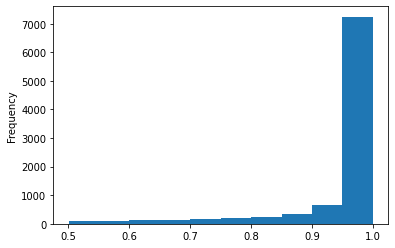

In [165]:
image_captions['hf_sent_conf'].plot.hist()

In [166]:
q = np.linspace(.1, 1, 9, 0)
image_captions['hf_sent_conf'].quantile(q)

0.1    0.828378
0.2    0.938458
0.3    0.972262
0.4    0.986283
0.5    0.992913
0.6    0.996107
0.7    0.997896
0.8    0.998998
0.9    0.999596
Name: hf_sent_conf, dtype: float64

As we can see, only 10% of the data has confidence under 80% - We are dealing with high confidence labels here!

<AxesSubplot:>

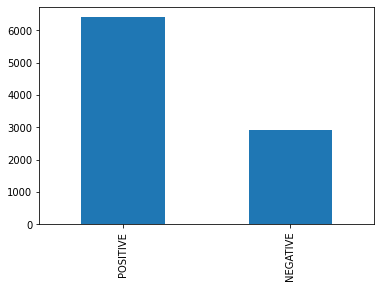

In [167]:
image_captions['hf_sent_class'].value_counts().plot(kind = 'bar')

In [168]:
image_captions['hf_sent_conf'].describe() 

count    9303.000000
mean        0.949668
std         0.098914
min         0.500172
25%         0.960117
50%         0.992913
75%         0.998537
max         0.999889
Name: hf_sent_conf, dtype: float64

Looks a bit more balanced using huggingface!

### Huggingface caption confidence thresholds

<AxesSubplot:ylabel='Frequency'>

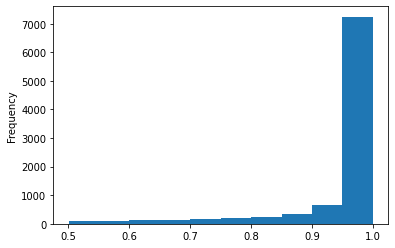

In [169]:
image_captions['hf_sent_conf'].plot.hist()

In [170]:
q = np.linspace(.1, 1, 9, 0)
image_captions['hf_sent_conf'].quantile(q)

0.1    0.828378
0.2    0.938458
0.3    0.972262
0.4    0.986283
0.5    0.992913
0.6    0.996107
0.7    0.997896
0.8    0.998998
0.9    0.999596
Name: hf_sent_conf, dtype: float64

As we can see, only 10% of the data has confidence under 80% - We are dealing with high confidence labels here!

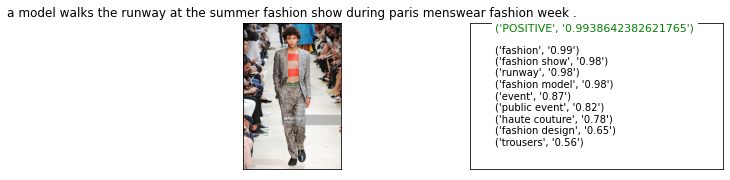

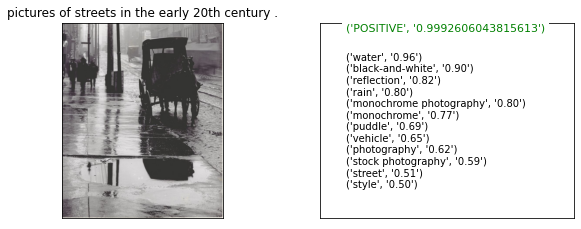

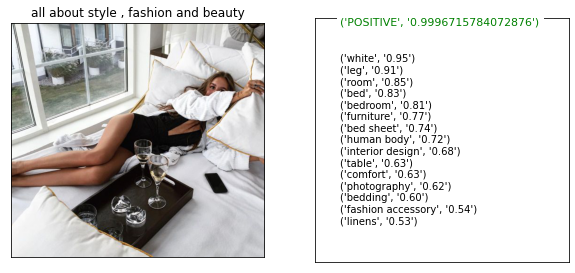

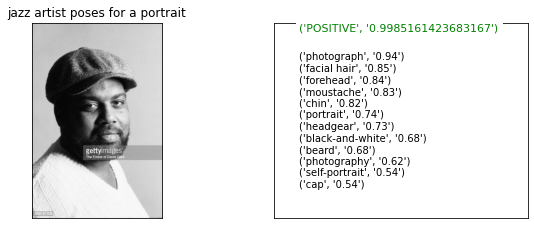

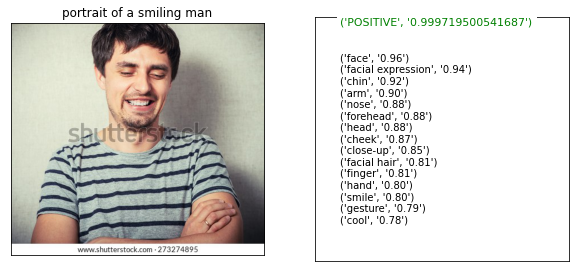

In [171]:
display_samples_with_hf_label(image_captions, "POSITIVE")


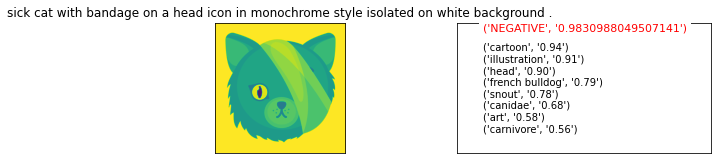

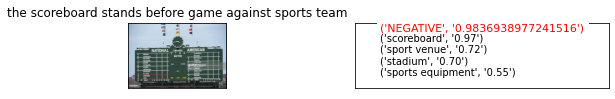

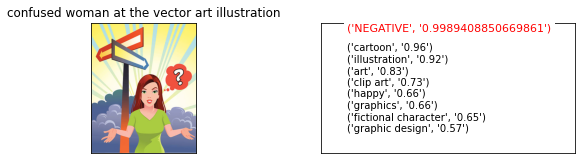

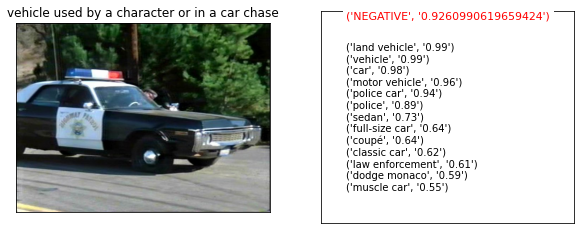

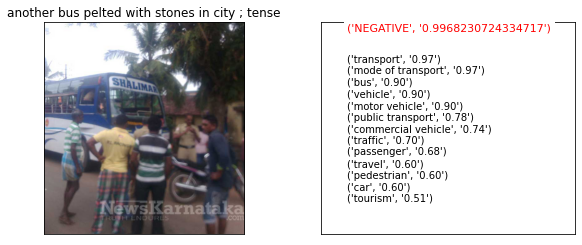

In [172]:
display_samples_with_hf_label(image_captions, "NEGATIVE")
